In [ ]:
from scipy.io import loadmat
data = loadmat("iss.mat")
out = loadmat("out.mat")
A = data["A"]; B = data["B"]; M = out["M"]
n = A.shape[0]; m = B.shape[1]

In [2]:
n, m

(270, 3)

In [3]:
import numpy as np
from scipy.integrate import odeint
A = A.toarray(); B = B.toarray()
u = np.array([0.05, 0.9, -0.95])
BU = np.dot(B, u)

def deriv(x, t, A, BU):
    return np.add(np.dot(A, x), BU) # dx/dt = Ax + Bu

In [12]:
%%time

delta = 0.01
time = np.arange(0, 20, delta)
x0 = np.dot(np.ones(n), -0.0001)

sol = odeint(deriv, x0, time, args=(A, BU))

CPU times: user 8.87 s, sys: 19.1 ms, total: 8.89 s
Wall time: 8.9 s


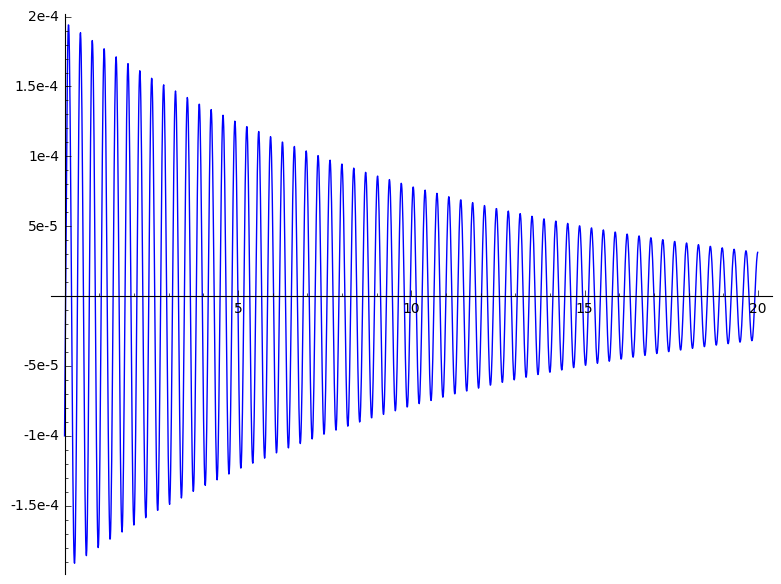

In [13]:
list_plot(zip(time, sol[:, 181]), plotjoined=true)

In [14]:
y1 = np.dot(M, np.transpose(sol)).flatten()

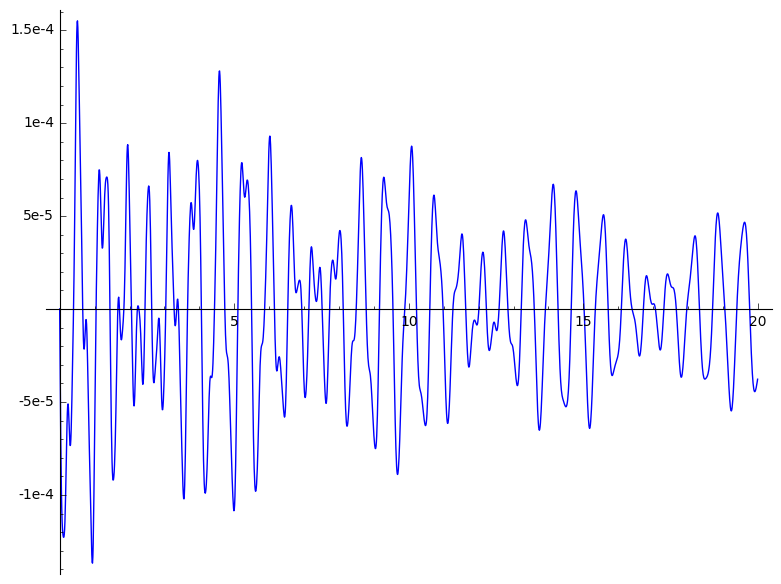

In [15]:
list_plot(zip(time, y1), plotjoined=true)